# Customer Segmentation using RFM Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [50]:
df = pd.read_excel(
    r'C:\Users\j\Desktop\Elevvo Internship Program\Tasks\Task 3 Customer Segmentation Using RFM Analysis\data\Online Retail.xlsx'
)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [4]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
# Check for negative or zero Quantity or UnitPrice
print(df[(df[ "Quantity" ] <= 0) | (df[ "UnitPrice" ] <= 0)].sample(5))

       InvoiceNo StockCode                        Description  Quantity  \
184925   C552720     20932              PINK POT PLANT CANDLE        -1   
41500     539856     22072  RED RETROSPOT TEA CUP AND SAUCER          1   
256648    559503     21763                                NaN         1   
241680   C558239     21890  S/6 WOODEN SKITTLES IN COTTON BAG        -1   
373600    569335    84660A                            damaged       -15   

               InvoiceDate  UnitPrice  CustomerID         Country  
184925 2011-05-11 09:49:00       2.95     18272.0  United Kingdom  
41500  2010-12-22 14:41:00       0.00         NaN  United Kingdom  
256648 2011-07-08 15:06:00       0.00         NaN  United Kingdom  
241680 2011-06-27 15:24:00       3.25     16966.0  United Kingdom  
373600 2011-10-03 13:57:00       0.00         NaN  United Kingdom  


# Dataset Overview

This dataset captures online retail transactions from a UK-based retailer, covering the period December 2010 – December 2011. Each observation corresponds to a single product line within an invoice.

# Main Attributes

InvoiceNo – Transaction identifier (unique per invoice)

StockCode – Product code

Description – Product description/name

Quantity – Number of units purchased

InvoiceDate – Timestamp of the transaction

UnitPrice – Item price in GBP

CustomerID – Unique customer reference

Country – Country where the purchase was made

# Data Quality Notes

Missing Values: Some records lack CustomerID.

Cancellations: Invoices starting with “C” represent cancelled transactions.

Anomalies: Negative or zero values for Quantity and UnitPrice appear, likely due to returns or data entry issues.

# Data cleaning step

In [ ]:
# Remove rows with missing CustomerID
df = df[df[ "CustomerID" ].notnull()]

In [ ]:
# Exclude canceled orders (InvoiceNo starts with  C )
df = df[~df[ "InvoiceNo" ].astype(str).str.startswith( "C" )]

In [ ]:
# Remove negative or zero Quantity and UnitPrice
df = df[(df[ "Quantity" ] > 0) & (df[ "UnitPrice" ] > 0)]

In [ ]:
# Create a TotalPrice column
df[ "TotalPrice" ] = df[ "Quantity" ] * df[ "UnitPrice" ]

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalPrice   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB
None


In [28]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID     TotalPrice  
count  397884.000000  397884.000000  
mean    15294.423453      22.397000  
min     12346.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.141560     309.071041  


In [29]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64


# RFM Scoring

In [ ]:
import datetime

# Reference date is one day after the last transaction
snapshot_date = df[ "InvoiceDate" ].max() + datetime.timedelta(days=1)


In [ ]:
rfm = df.groupby( "CustomerID" ).agg({
     "InvoiceDate" : lambda x: (snapshot_date - x.max()).days,  # Recency
     "InvoiceNo" :  "nunique" ,                                   # Frequency
     "TotalPrice" :  sum                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = [ "CustomerID" ,  "Recency" ,  "Frequency" ,  "Monetary" ]


In [33]:
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [34]:
print(rfm.describe())

         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000


In [ ]:
zero_monetary = rfm[rfm[ "Monetary" ] == 0]
print(zero_monetary.head())

Empty DataFrame
Columns: [CustomerID, Recency, Frequency, Monetary]
Index: []


In [ ]:
zero_ids = zero_monetary[ "CustomerID" ]
df[df[ "CustomerID" ].isin(zero_ids)].sort_values(by= "CustomerID" )

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


In [ ]:
# Recency
rfm[ "R_Score" ] = pd.qcut(rfm[ "Recency" ], 5, labels=[5, 4, 3, 2, 1])

# Frequency
rfm[ "F_Score" ] = pd.qcut(rfm[ "Frequency" ].rank(method= "first" ), 5, labels=[1, 2, 3, 4, 5])

# Monetary
rfm[ "M_Score" ] = pd.qcut(rfm[ "Monetary" ], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfm[ "RFM_Score" ] = rfm[ "R_Score" ].astype(str) + rfm[ "F_Score" ].astype(str) + rfm[ "M_Score" ].astype(str)

In [ ]:
rfm[[ "CustomerID" ,  "Recency" ,  "Frequency" , " Monetary" ,  "R_Score" ,  "F_Score" ,  "M_Score" ,  "RFM_Score" ]].head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,7,4310.00,5,5,5,555
2,12348.0,75,4,1797.24,2,4,4,244
3,12349.0,19,1,1757.55,4,1,4,414
4,12350.0,310,1,334.40,1,1,2,112


In [ ]:
# Convert categorical scores to numeric
rfm[ "R_Score" ] = rfm[ "R_Score" ].astype(int)
rfm[ "F_Score" ] = rfm[ "F_Score" ].astype(int)
rfm[ "M_Score" ] = rfm[ "M_Score" ].astype(int)

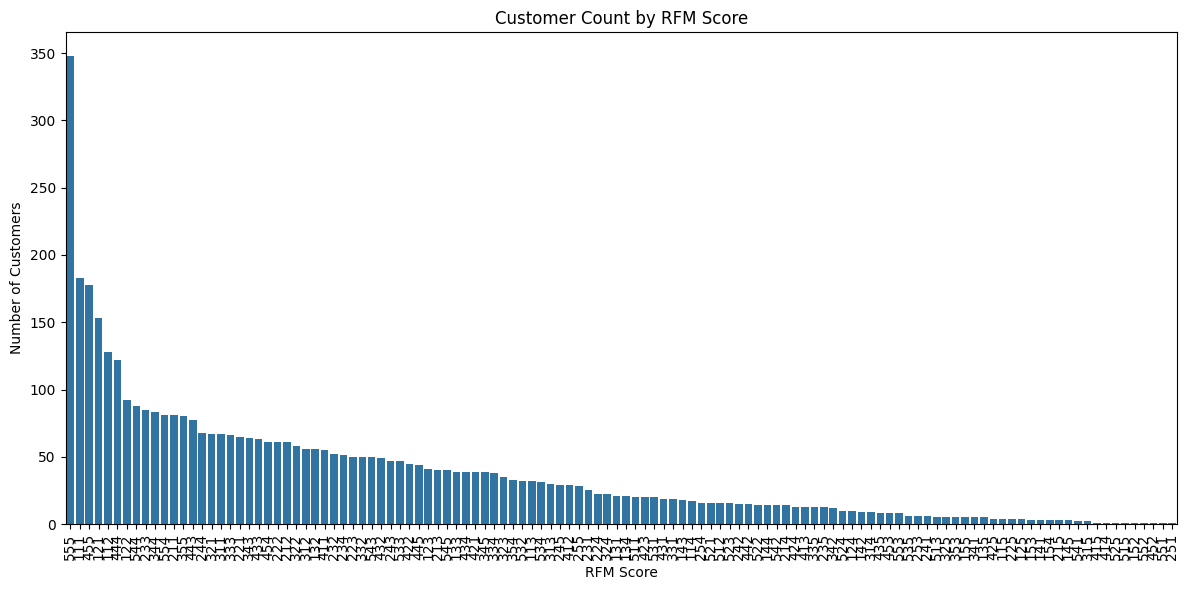

In [ ]:
# Bar chart: count of customers per RFM score
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm, x= "RFM_Score" , order=rfm[ "RFM_Score" ].value_counts().index)
plt.xticks(rotation=90)
plt.title("Customer Count by RFM Score")
plt.xlabel("RFM Score")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

In [ ]:
def segment_customers(row):
    if row[ "RFM_Score" ] in [ 555 ,  554 ,  544 ,  545 ,  454 ,  455 ,  445 ]:
        return  "Champions" 
    elif row[ "RFM_Score" ] in [ 543 ,  444 ,  435 ,  355 ,  354 ,  345 ,  344 ,  335 ]:
        return  "Loyal Customers" 
    elif row[ "RFM_Score" ] in [ 512 ,  511 ,  422 ,  421 ,  412 ,  411 ,  311 ]:
        return  "Potential Loyalists" 
    elif row[ "RFM_Score" ] in [ 533 ,  532 ,  531 ,  523 ,  522 ,  521 ,  515 ,  514 ,  513 ,  425 ,  424 ,  413 ,  414 ,  415 ,  315 ,  314 ,  313 ]:
        return  "New Customers" 
    elif row[ "RFM_Score" ] in [ 155 ,  154 ,  144 ,  214 ,  215 ,  115 ,  114 ]:
        return  "At Risk" 
    elif row[ "RFM_Score" ] in [ 255 ,  254 ,  245 ]:
        return  "Cannot Lose Them" 
    elif row[ "RFM_Score" ] in [ 332 ,  333 ,  231 ,  241 ,  251 ,  233 ,  232 ,  223 ,  222 ,  132 ,  123 ,  122 ,  212 ,  211 ]:
        return  "Hibernating" 
    else:
        return  "Others" 
    

rfm[ "Segment" ].value_counts()

Segment
Others                 1715
Champions               840
Hibernating             727
Loyal Customers         428
Potential Loyalists     271
New Customers           224
Cannot Lose Them         73
At Risk                  60
Name: count, dtype: int64

C:\Users\j\AppData\Local\Temp\ipykernel_13868\2441130541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


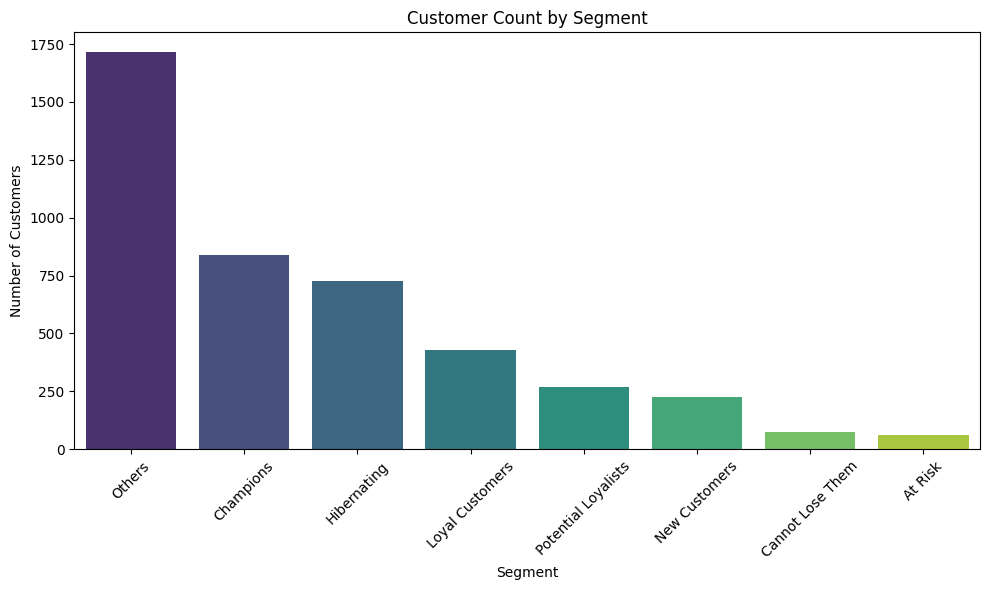

In [ ]:
segment_counts = rfm[ "Segment" ].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette= "viridis" )
plt.title( "Customer Count by Segment" )
plt.xlabel( "Segment" )
plt.ylabel( "Number of Customers" )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

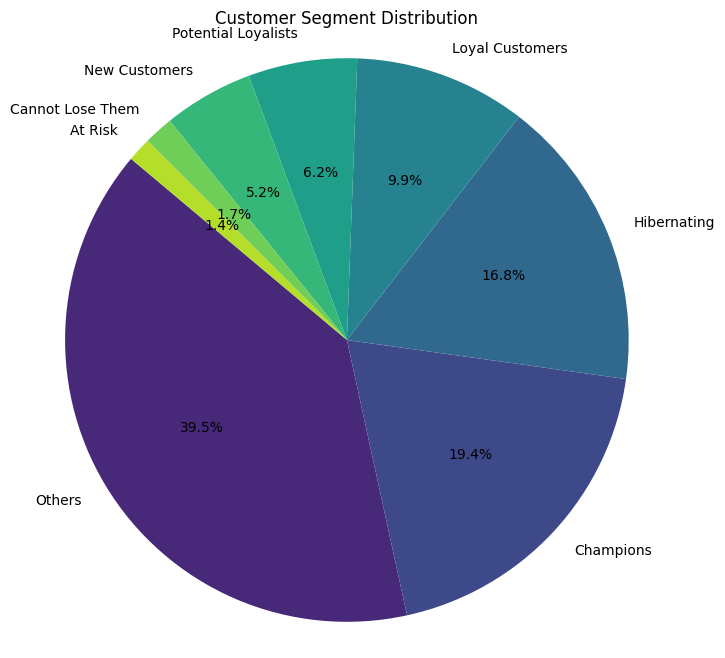

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct= "%1.1f%%" , startangle=140, colors=sns.color_palette( "viridis" , len(segment_counts)))
plt.title( "Customer Segment Distribution" )
plt.axis( "equal" )
plt.show()

# marketing_strategies

 Champions :  Reward them, ask for reviews, upsell premium products

 Loyal Customers :  Recommend new products, loyalty programs, early access

 Potential Loyalists :  Membership programs, recommend popular products

 New Customers :  Welcome campaigns, onboarding, support

 At Risk :  Reactivation campaigns, special offers, surveys

 Cannot Lose Them :  Win-back campaigns, personalized offers, premium support

 Hibernating :  Reactivation emails, special discounts, new product alerts

 Others :  General marketing campaigns, awareness programs 